<a href="https://colab.research.google.com/github/davidcamilo0710/QATAR_2022_Prediction/blob/master/Modeling%2BTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDEX
- RESUME
- GROUP STAGE MODELING
  - Choosing the model
  - XGB Boost - Tuning & Hold-out Validation
  - Creating a pipeline for the XGB model
- KNOCKOUT STAGE MODELING
  - Choosing a model for the Knockout Stage
  - Random Forest - Tuning & Hold-out Validation
  - XGB Boost - Tuning & Hold-out Validation
  - Creating a pipeline for the XGB Boost model

# RESUME

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
final_df = pd.read_csv('data/training.csv')
final_df.tail()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
9316,Netherlands,Wales,10,18,1,81.0,74.0,85.0,83.0,84.0,75.0,73.0,78.0
9317,Poland,Belgium,26,2,0,87.0,89.0,75.0,85.0,76.0,81.0,86.0,86.0
9318,Chile,Ghana,28,60,0,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0
9319,Japan,Tunisia,23,35,0,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0
9320,Korea Republic,Egypt,29,32,1,75.0,70.0,73.0,80.0,74.0,70.0,79.0,71.0


# GROUP STAGE MODELING

### Choosing a model

In [3]:
# I save the original data frame in a flag to then train the final pipeline
pipe_DF = final_df
# Dummies for categorical columns
final_df = pd.get_dummies(final_df)

I split the dataset into training, testing and validation.

In [4]:
X = final_df.drop('Team1_Result',axis=1)
y = final_df['Team1_Result']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

 Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

Defining function to display the confusion matrix quickly.

In [6]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

* **Random Forest**

              precision    recall  f1-score   support

           0       0.46      0.57      0.51       116
           1       0.63      0.74      0.68       241
           2       0.30      0.11      0.16       110

    accuracy                           0.55       467
   macro avg       0.46      0.47      0.45       467
weighted avg       0.51      0.55      0.51       467



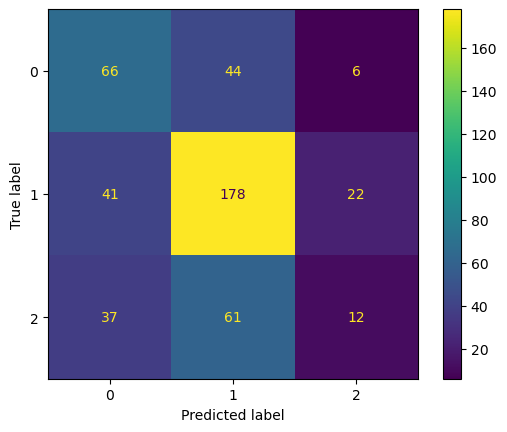

In [7]:
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

* **Ada Boost Classifier**

              precision    recall  f1-score   support

           0       0.45      0.50      0.47       116
           1       0.62      0.86      0.72       241
           2       0.33      0.01      0.02       110

    accuracy                           0.57       467
   macro avg       0.47      0.46      0.40       467
weighted avg       0.51      0.57      0.49       467



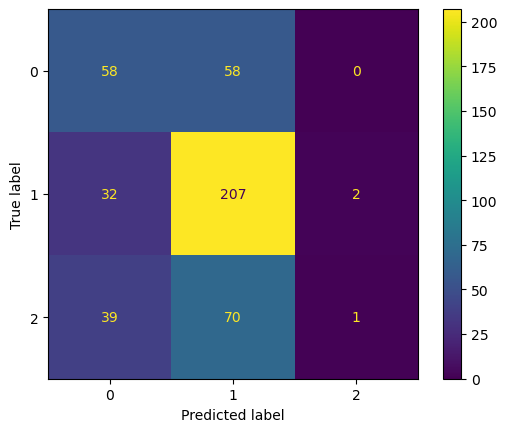

In [8]:
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

* **XGB Boost**

In [9]:
!pip3 install xgboost

/Users/taher/ML_course/sample_project/env/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


              precision    recall  f1-score   support

           0       0.46      0.53      0.49       116
           1       0.65      0.80      0.72       241
           2       0.31      0.10      0.15       110

    accuracy                           0.57       467
   macro avg       0.47      0.48      0.45       467
weighted avg       0.52      0.57      0.53       467



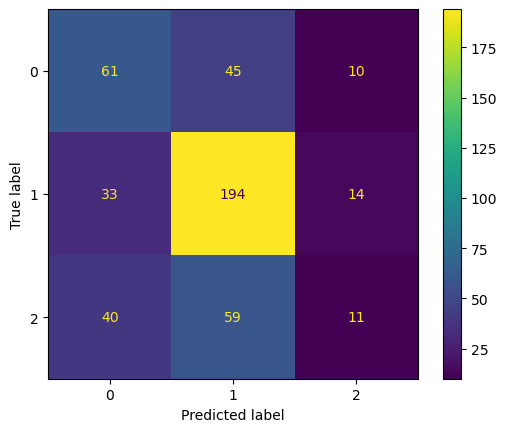

In [10]:
from xgboost import XGBClassifier
metrics_display(XGBClassifier(use_label_encoder=False))

* **Neural network**



In [11]:
import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras import Input

X_train.shape

2022-11-15 08:58:34.999658: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(8388, 404)

2022-11-15 08:58:42.689657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
210/210 [==============================] - 2s 4ms/step - loss: 0.9942 - accuracy: 0.5304 - val_loss: 0.8869 - val_accuracy: 0.5995
Epoch 2/10
210/210 [==============================] - 1s 5ms/step - loss: 0.8962 - accuracy: 0.5942 - val_loss: 0.8944 - val_accuracy: 0.5942
Epoch 3/10
210/210 [==============================] - 1s 4ms/step - loss: 0.8706 - accuracy: 0.5991 - val_loss: 0.8989 - val_accuracy: 0.5942
Epoch 4/10
210/210 [==============================] - 1s 4ms/step - loss: 0.8513 - accuracy: 0.6167 - val_loss: 0.8958 - val_accuracy: 0.5906
Epoch 5/10
210/210 [==============================] - 1s 4ms/step - loss: 0.8407 - accuracy: 0.6124 - val_loss: 0.9040 - val_accuracy: 0.5846
Epoch 6/10
210/210 [==============================] - 1s 5ms/step - loss: 0.8330 - accuracy: 0.6210 - val_loss: 0.8999 - val_accuracy: 0.5876
Epoch 7/10
210/210 [==============================] - 1s 4ms/step - loss: 0.8155 - accuracy: 0.6241 - val_loss: 0.9154 - val_accuracy: 0.5822
Epoch 

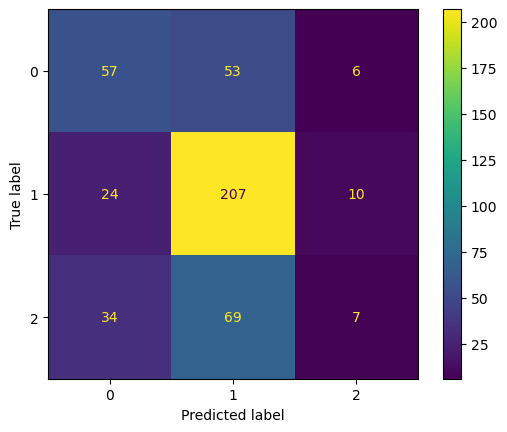

In [12]:
model = Sequential()
model.add(Input(shape=(404,)))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)

The XGBoost model performs better than the others, so I will tune its hyperparameters and evaluate the performance based on the validation dataset.

### XGB Boost - Tuning & Hold-out Validation

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [200,250,300,350,400,450,500],
    "max_depth" : [3,4,5,6,7,8,9],
    "gamma" : [0.001,0.01,0.1],
    "learning_rate" : [0.001,0.01,0.1]
}

In [14]:
# make a GridSearchCV object
GS = GridSearchCV(estimator = XGBClassifier(use_label_encoder=False),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)

/Users/taher/ML_course/sample_project/env/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Uncomment the following line to enable the tuning. The best result I found was: gamma = 0.01, learning_rate = 0.01, n_estimators = 300, max_depth = 4

In [15]:
#GS.fit(X_train,y_train)

To get only the best hyperparameter values

In [16]:
#print(GS.best_params_) 

Initially, I validate the model with its default parameters, and then I will validate it with its tuned parameters.

* **Default Hyperparameters**

              precision    recall  f1-score   support

           0       0.54      0.58      0.56       121
           1       0.65      0.81      0.72       240
           2       0.26      0.09      0.13       105

    accuracy                           0.59       466
   macro avg       0.48      0.49      0.47       466
weighted avg       0.53      0.59      0.54       466



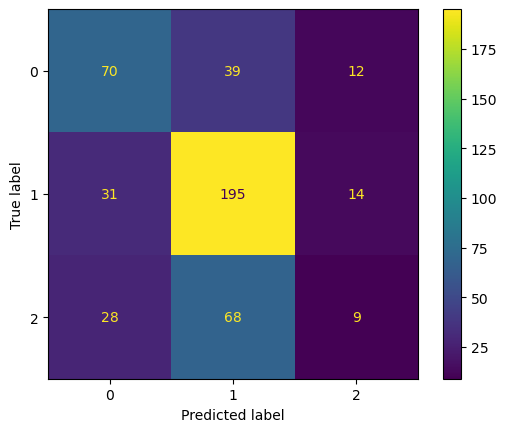

In [17]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

* **Tuned Hyperparameters**

/Users/taher/ML_course/sample_project/env/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


              precision    recall  f1-score   support

           0       0.57      0.63      0.60       121
           1       0.64      0.88      0.75       240
           2       0.25      0.01      0.02       105

    accuracy                           0.62       466
   macro avg       0.49      0.51      0.45       466
weighted avg       0.54      0.62      0.54       466



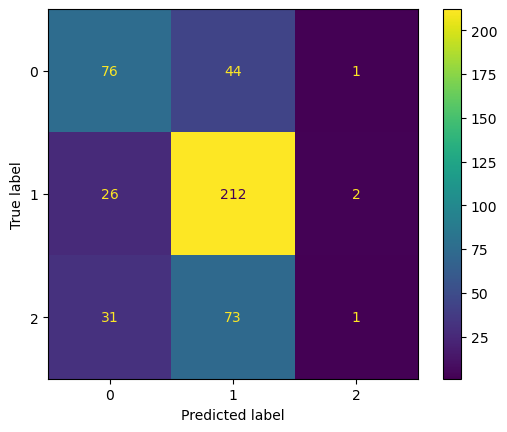

In [18]:
model = XGBClassifier(use_label_encoder = False, gamma = 0.01, learning_rate = 0.01, n_estimators = 300, max_depth = 4)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

The model improves a bit, so I will create a pipe to use the model later easily.

### Creating a pipeline for the XGB model

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(),['Team1', 'Team2']),remainder='passthrough')

pipe_X = pipe_DF.drop('Team1_Result',axis=1)
pipe_y = pipe_DF['Team1_Result']

from sklearn.pipeline import make_pipeline
pipe_League = make_pipeline(column_trans,StandardScaler(with_mean=False),XGBClassifier(use_label_encoder=False, gamma= 0.01, learning_rate= 0.01, n_estimators= 300, max_depth= 4))
pipe_League.fit(pipe_X,pipe_y)

/Users/taher/ML_course/sample_project/env/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_...
                               feature_types=None, gamma=0.01, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.01,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=4, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=300, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto', ...))])

In [21]:
import joblib
joblib.dump(pipe_League,"models/groups_stage_prediction.pkl")

['models/groups_stage_prediction.pkl']

# KNOCKOUT STAGE MODELING

### Choosing the model 

Removing Draw status.

In [22]:
knock_df = pipe_DF[pipe_DF['Team1_Result'] != 2]

In [23]:
pipe_knock_df = knock_df
knock_df = pd.get_dummies(knock_df)
X = knock_df.drop('Team1_Result',axis=1)
y = knock_df['Team1_Result']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

* **Ada Boost Classifier**

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       243
           1       0.81      0.86      0.84       479

    accuracy                           0.78       722
   macro avg       0.75      0.74      0.74       722
weighted avg       0.77      0.78      0.77       722



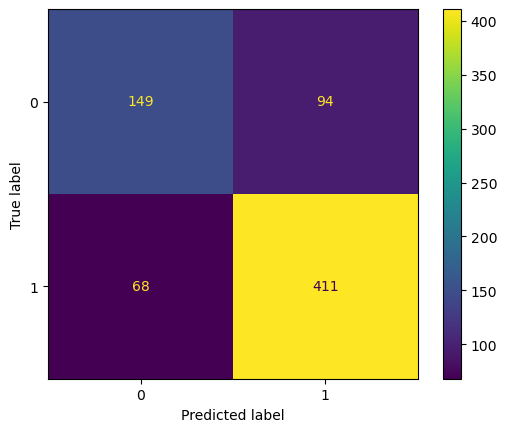

In [24]:
metrics_display(AdaBoostClassifier())

*   **Random Forest**




              precision    recall  f1-score   support

           0       0.66      0.64      0.65       243
           1       0.82      0.83      0.82       479

    accuracy                           0.77       722
   macro avg       0.74      0.73      0.74       722
weighted avg       0.76      0.77      0.77       722



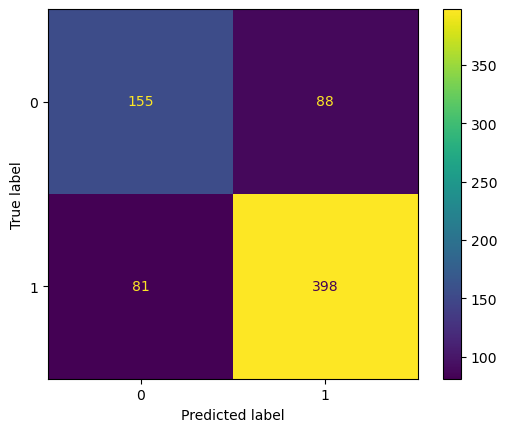

In [25]:
metrics_display(RandomForestClassifier())

* **XGB Boost**

/Users/taher/ML_course/sample_project/env/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


              precision    recall  f1-score   support

           0       0.67      0.65      0.66       243
           1       0.82      0.84      0.83       479

    accuracy                           0.77       722
   macro avg       0.75      0.74      0.74       722
weighted avg       0.77      0.77      0.77       722



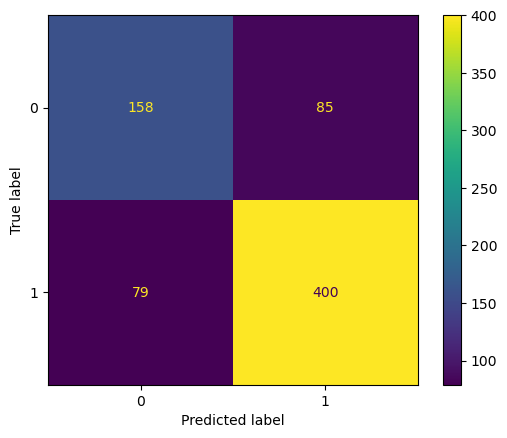

In [26]:
metrics_display(XGBClassifier(use_label_encoder=False))

* **Neural network**

In [27]:
X_train.shape

(5772, 399)

Epoch 1/10
145/145 [==============================] - 2s 5ms/step - loss: 1.3461 - accuracy: 0.6669 - val_loss: 0.5718 - val_accuracy: 0.7740
Epoch 2/10
145/145 [==============================] - 1s 4ms/step - loss: 0.5723 - accuracy: 0.7039 - val_loss: 0.5138 - val_accuracy: 0.7766
Epoch 3/10
145/145 [==============================] - 1s 3ms/step - loss: 0.5384 - accuracy: 0.7267 - val_loss: 0.5189 - val_accuracy: 0.7610
Epoch 4/10
145/145 [==============================] - 1s 4ms/step - loss: 0.5270 - accuracy: 0.7420 - val_loss: 0.5034 - val_accuracy: 0.7758
Epoch 5/10
145/145 [==============================] - 1s 4ms/step - loss: 0.5151 - accuracy: 0.7479 - val_loss: 0.4731 - val_accuracy: 0.7792
Epoch 6/10
145/145 [==============================] - 1s 4ms/step - loss: 0.5014 - accuracy: 0.7540 - val_loss: 0.4700 - val_accuracy: 0.7818
Epoch 7/10
145/145 [==============================] - 1s 4ms/step - loss: 0.5065 - accuracy: 0.7533 - val_loss: 0.4952 - val_accuracy: 0.7671
Epoch 

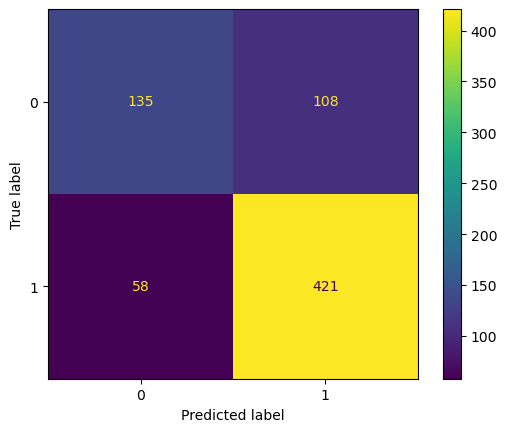

In [28]:
model = Sequential()
model.add(Input(shape=(399,)))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)

All models have very similar performance. Therefore I will tune the Random Forest model and the XGB Boost.

### Random Forest - Tuning & Hold-out Validation 

In [29]:
search_space = {
    "max_depth" : [11,12,13,14,15,16],
    "max_leaf_nodes" : [170,180,190,200,210,220,230],
    "min_samples_leaf" : [3,4,5,6,7,8],
    "n_estimators" : [310,320,330,340,350]
}

In [30]:
GS = GridSearchCV(estimator = RandomForestClassifier(),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)

Uncomment the following lines to enable the tuning. The best result I found was: max_depth = 16, n_estimators = 320, max_leaf_nodes = 190, min_samples_leaf = 5

In [31]:
#GS.fit(X_train,y_train)

In [32]:
#print(GS.best_params_)

* **Default Hyperparameters**

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       288
           1       0.78      0.80      0.79       433

    accuracy                           0.74       721
   macro avg       0.73      0.73      0.73       721
weighted avg       0.74      0.74      0.74       721



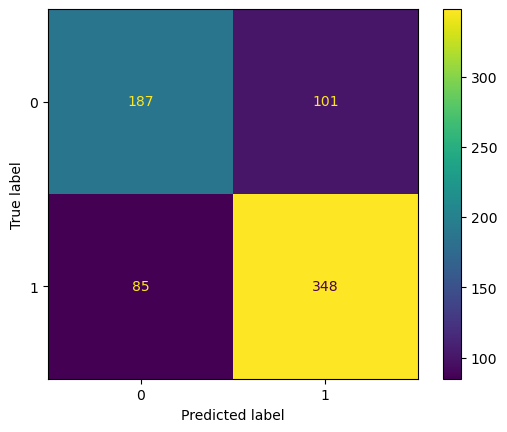

In [33]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

* **Tuned Hyperparameters**

              precision    recall  f1-score   support

           0       0.75      0.61      0.67       288
           1       0.77      0.86      0.81       433

    accuracy                           0.76       721
   macro avg       0.76      0.74      0.74       721
weighted avg       0.76      0.76      0.76       721



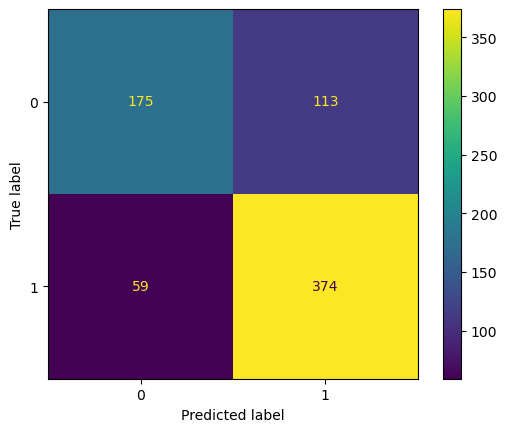

In [34]:
model = RandomForestClassifier(max_depth= 16, n_estimators=320, max_leaf_nodes= 190, min_samples_leaf= 5)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

The Random Forest greatly improves performance with the tuned hyperparameters; let's see the XGB Boost model.

### XGB Boost - Tuning & Hold-out Validation

In [35]:
search_space = {
    "n_estimators" : [300,350,400,450,500,550,600],
    "max_depth" : [3,4,5,6,7,8,9],
    "gamma" : [0.001,0.01,0.1],
    "learning_rate" : [0.001,0.01]
}

In [36]:
GS = GridSearchCV(estimator = XGBClassifier(use_label_encoder=False),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)

/Users/taher/ML_course/sample_project/env/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [37]:
#GS.fit(X_train,y_train)

In [38]:
#print(GS.best_params_) # to get only the best hyperparameter values that we searched for

Uncomment the following lines to enable the tuning. The best result I found was: gamma = 0.01, learning_rate = 0.01, max_depth = 5, n_estimators = 500

* **Default Hyperparameters**

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       288
           1       0.77      0.82      0.80       433

    accuracy                           0.75       721
   macro avg       0.74      0.73      0.73       721
weighted avg       0.75      0.75      0.75       721



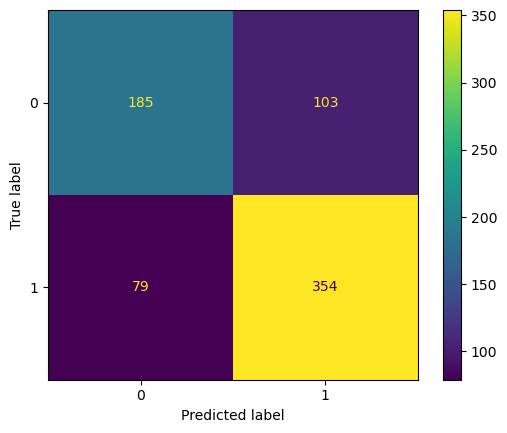

In [39]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

* **Tuned Hyperparameters**

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       288
           1       0.78      0.85      0.81       433

    accuracy                           0.77       721
   macro avg       0.76      0.75      0.75       721
weighted avg       0.76      0.77      0.76       721



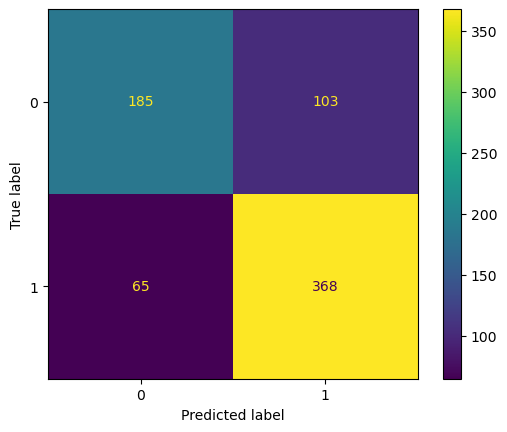

In [40]:
model = XGBClassifier(gamma=0.01,learning_rate=0.01, max_depth=5, n_estimators=500)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

The model does not improve notably. However, it does improve compared to the Random Forest.

### Creating a pipeline for the XGB Boost model

In [41]:
pipe_X = pipe_knock_df.drop('Team1_Result',axis=1)
pipe_y = pipe_knock_df['Team1_Result']
pipe_knock = make_pipeline(column_trans,StandardScaler(with_mean=False),XGBClassifier(gamma=0.01,learning_rate=0.01, max_depth=5, n_estimators=500))
pipe_knock.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_...
                               feature_types=None, gamma=0.01, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.01,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=500, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, ...))])

In [42]:
joblib.dump(pipe_knock,"models/knockout_stage_prediction.pkl")

['models/knockout_stage_prediction.pkl']